In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# show all columns
pd.set_option('display.max_columns', None)

In [2]:
import chart_studio.plotly as py
import cufflinks as cf

cf.go_offline()

PROJ: proj_create_from_database: Cannot find proj.db


In [16]:
from keplergl import KeplerGl 


#### Import data

In [21]:
listings = pd.read_csv('./Airbnb/listings_new_2_distr.csv')
listings = listings.drop(columns=['Unnamed: 0'])


In [158]:
calendar = pd.read_csv('./Airbnb/calendar_clean.csv')
calendar['date'] = pd.to_datetime(calendar['date'])

In [26]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

#### Remove outliers

In [23]:
listings = listings[listings['accommodates'] <= 7]
listings = listings[listings['bathrooms'] <= 3]
listings = listings[listings['bedrooms'] <= 4]
listings = listings[listings['beds'] <= 4]
listings = listings[listings['guests_included'] <= 4]
listings = listings[listings['minimum_nights'] <= 5]
listings = listings[listings['price'] > 0]
listings = listings[listings['price'] <= 239]

In [24]:
listings.shape

(16245, 52)

#### Visualize

Text(0.5, 1.0, 'Listings per Neighbourhood\n')

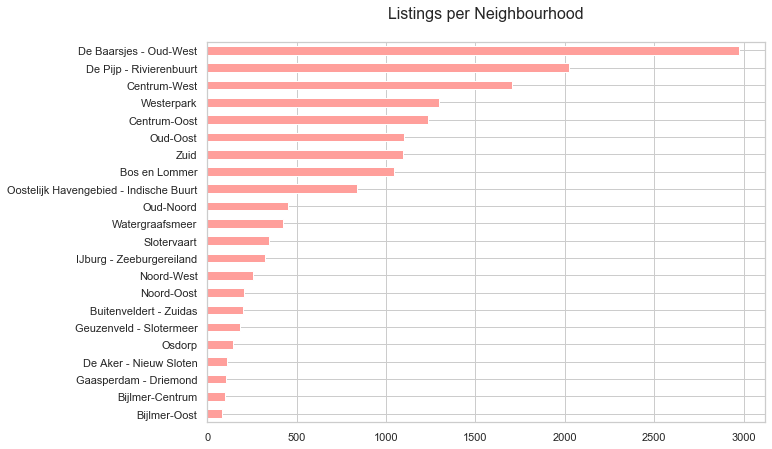

In [28]:
# Listings per Neighbourhood

plt.subplots(figsize=(10, 7))
listings['neighbourhood'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per Neighbourhood\n', fontsize=16)

Text(0.5, 1.0, 'Listings per District\n')

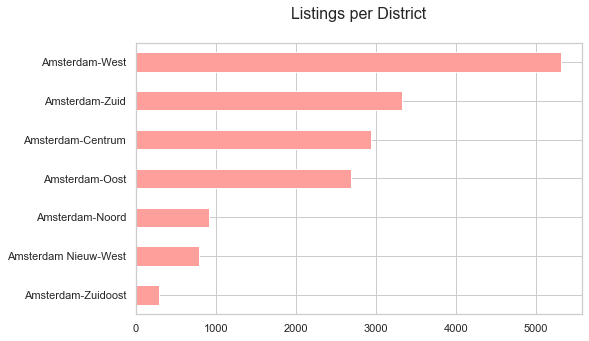

In [27]:
# Listings per District

plt.subplots(figsize=(8,5))
listings['district'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per District\n', fontsize=16)

Text(0.5, 1.0, 'Listings per property type\n')

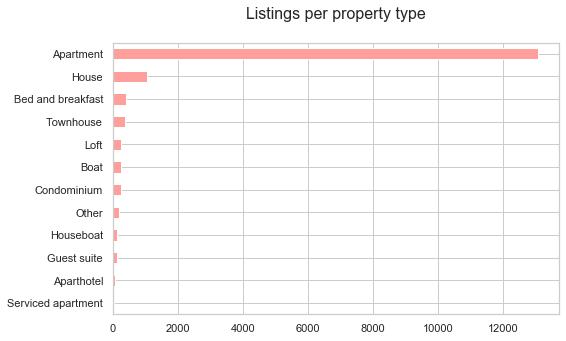

In [29]:
# Listings per property type

plt.subplots(figsize=(8,5))
listings['property_type'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per property type\n', fontsize=16)

Text(0.5, 1.0, 'Listings per room type\n')

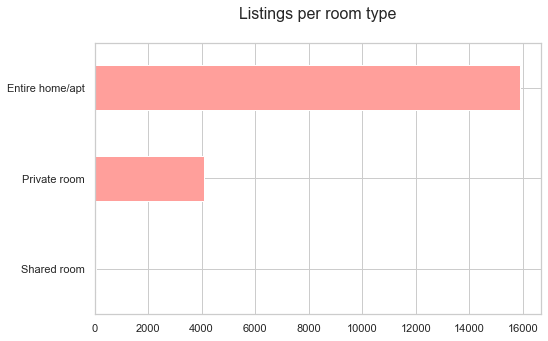

In [73]:
# Listings per room type

plt.subplots(figsize=(8,5))
listings['room_type'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per room type\n', fontsize=16)

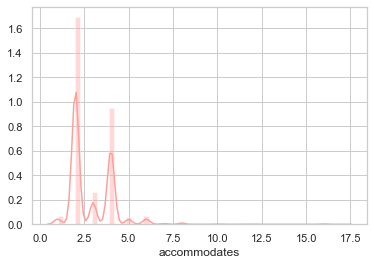

In [79]:
sns.distplot(listings.accommodates, color='r')

In [31]:
# Avg daily price per neighborhood

df2 = pd.DataFrame(listings.groupby('neighbourhood')['price'].mean().reset_index())
df3 = df2.sort_values(by=['price'], ascending=False)
df3

,neighbourhood,price
5,Centrum-West,141.505288
4,Centrum-Oost,138.030769
8,De Pijp - Rivierenbuurt,129.244565
21,Zuid,127.779909
17,Oud-Oost,125.076225
20,Westerpark,124.993050
7,De Baarsjes - Oud-West,124.076742
11,IJburg - Zeeburgereiland,119.470588
19,Watergraafsmeer,118.115023
16,Oud-Noord,116.624724


Text(0, 0.5, ' ')

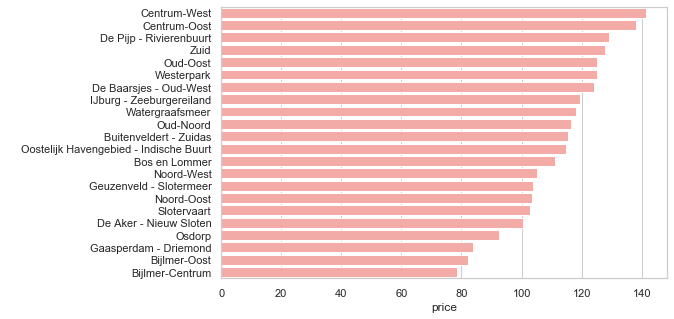

In [32]:
# Price per neighborhood

plt.subplots(figsize=(8,5))
ax = sns.barplot(x="price", y="neighbourhood", data=df3,color='r')
ax.set_ylabel(' ')

In [123]:
# Avg daily price per district

df2 = pd.DataFrame(listings.groupby('district')['price'].mean().reset_index())
df3 = df2.sort_values(by=['price'], ascending=False)
df3

,district,price
1,Amsterdam-Centrum,189.688116
5,Amsterdam-Zuid,161.713298
3,Amsterdam-Oost,140.313097
2,Amsterdam-Noord,138.486934
4,Amsterdam-West,138.160488
0,Amsterdam Nieuw-West,116.071744
6,Amsterdam-Zuidoost,94.583587


Text(0, 0.5, ' ')

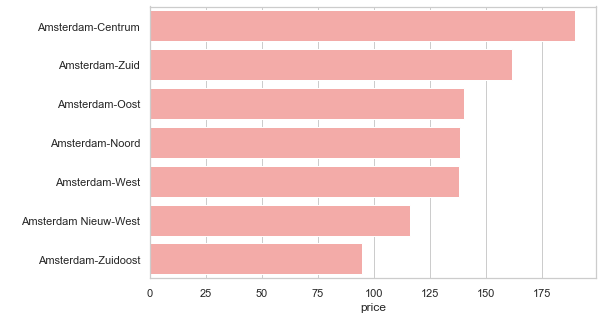

In [128]:
# Price per district
plt.subplots(figsize=(8,5))
ax = sns.barplot(x="price", y="district", data=df3, color='r')
ax.set_ylabel(' ')

In [132]:
# Neighborhoods witht he highest rated listings

df2 = pd.DataFrame(listings.groupby('neighbourhood')['review_scores_rating'].mean().reset_index())
df3 = df2.sort_values(by=['review_scores_rating'], ascending=False)
df3

,neighbourhood,review_scores_rating
6,De Aker - Nieuw Sloten,95.747748
11,IJburg - Zeeburgereiland,95.618667
21,Zuid,95.506612
2,Bos en Lommer,95.323353
7,De Baarsjes - Oud-West,95.289075
17,Oud-Oost,95.214161
18,Slotervaart,95.071217
20,Westerpark,95.065102
13,Noord-West,95.040146
19,Watergraafsmeer,94.927632


Text(0.5, 1.0, 'Listings per cancellation_policy\n')

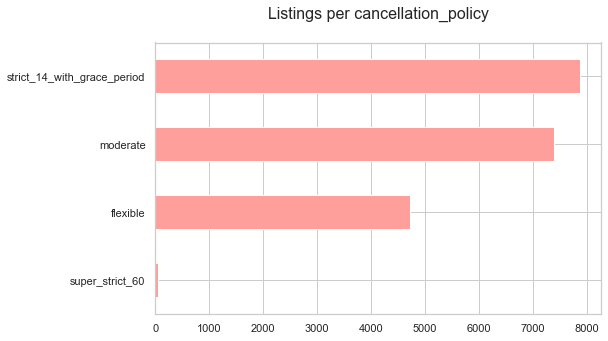

In [135]:
plt.subplots(figsize=(8,5))
listings['cancellation_policy'].value_counts(ascending=True).plot.barh(color='r')
plt.title('Listings per cancellation_policy\n', fontsize=16)

In [159]:
calendar.head()

,Unnamed: 0,listing_id,date,available,price
0,240,255809,2019-12-05,t,150.0
1,241,255809,2019-12-04,t,150.0
2,242,255809,2019-12-03,t,150.0
3,243,255809,2019-12-02,t,150.0
4,244,255809,2019-12-01,t,150.0


In [160]:
calendar.dtypes

Unnamed: 0             int64
listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [155]:
calendar['year'] = calendar['date'].dt.year

In [177]:
cal = calendar.groupby('date')['available'].count()
cal2 = cal.reset_index()
col = ['date', 'count']
cal2.columns=col
cal2.head()
cal2.shape

(366, 2)

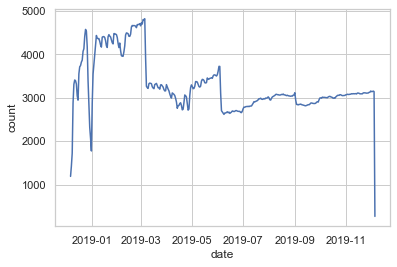

In [178]:
sns.lineplot(x="date", y="count", data=cal2)

In [179]:
cal2.iplot(kind='line', x='date', y = 'count')

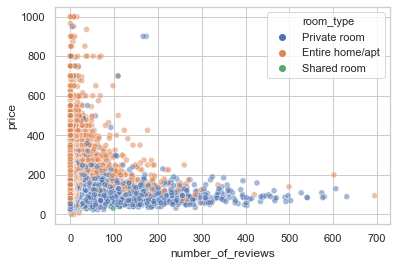

In [200]:
sns.scatterplot(x='number_of_reviews',y='price',data=listings[listings.price<1000],alpha=0.5,
                hue='room_type',legend="full", cmap='r')

In [33]:
listings.head()

,id,host_id,neighbourhood,latitude,longitude,price,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,district
0,2818,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,59,2008-09-24,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,f,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",100.0,50.0,1,20.0,3,15,today,17,44,44,44,248,2009-03-30,2018-11-28,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,strict_14_with_grace_period,f,f,1,2.10,Amsterdam-Oost
1,3209,3806,Westerpark,52.390225,4.873924,160,2008-10-24,within an hour,100.0,f,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,t,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Paid parking off premi...",300.0,40.0,2,15.0,4,20,7 weeks ago,0,0,0,47,42,2015-07-31,2018-08-29,96.0,10.0,9.0,10.0,10.0,9.0,9.0,f,moderate,f,f,1,1.03,Amsterdam-West
2,20168,59484,Centrum-Oost,52.365087,4.893541,80,2009-12-02,within a few hours,100.0,f,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,t,Townhouse,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,""Paid parking off premises"",...",NaN,NaN,2,0.0,1,1000,today,0,7,24,198,233,2010-03-02,2018-11-30,87.0,9.0,10.0,9.0,9.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2,2.18,Amsterdam-Centrum
4,27886,97647,Centrum-West,52.386727,4.892078,150,2010-03-23,within an hour,100.0,t,1.0,1.0,"['email', 'phone', 'reviews', 'jumio']",t,t,t,Houseboat,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Breakfast,Heating,""Smoke det...",0.0,0.0,1,0.0,2,730,today,16,37,54,199,171,2012-01-09,2018-11-25,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,1,2.03,Amsterdam-Centrum
5,28658,123414,Bos en Lommer,52.375342,4.857289,65,2010-05-12,within an hour,100.0,f,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,t,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Paid parking off...",150.0,15.0,2,0.0,3,15,2 months ago,11,29,52,295,434,2010-05-16,2018-11-19,93.0,9.0,10.0,10.0,9.0,9.0,9.0,f,moderate,t,t,2,4.16,Amsterdam-West


#### Kepler gl

In [35]:
df = listings[["id", 'neighbourhood', 'latitude', 'longitude', 'price', 'host_response_time', 'host_is_superhost',
              'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'minimum_nights',
              'number_of_reviews', 'review_scores_rating', 'instant_bookable', 'cancellation_policy', 'district']]

In [40]:
df2 = df[['latitude', 'longitude', 'room_type', 'accommodates']]

In [47]:
map_1 = KeplerGl(height=500)
map_1

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(height=500)

In [48]:
#map_1.add_data(data=df2, name='data_1')

In [49]:
#map_1.save_to_html(file_name="my_map.html")

Map saved to my_map.html!
